In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tqdm import tqdm
from sklearn.metrics import (precision_recall_curve, confusion_matrix,f1_score, roc_auc_score,
                             roc_curve, recall_score, precision_score, accuracy_score)
from sklearn.model_selection import StratifiedKFold

# Data Preprocessing

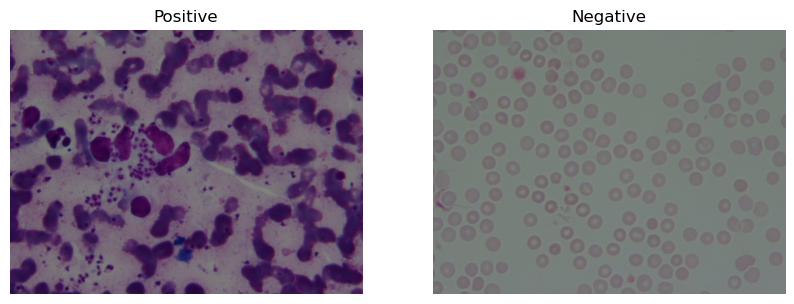

In [2]:
pos_dir = '/kaggle/input/leishmania-classification-data/Positive'
neg_dir = '/kaggle/input/leishmania-classification-data/Negative'

# take a look at a positive and a negative sample

tmp_pos_smp = plt.imread(pos_dir+'/'+os.listdir(pos_dir)[0])
tmp_neg_smp = plt.imread(neg_dir+'/'+os.listdir(neg_dir)[0])

fig = plt.figure(figsize=(10,8))

fig.add_subplot(1,2,1)
plt.imshow(tmp_pos_smp)
plt.axis('off')
plt.title('Positive')

fig.add_subplot(1,2,2)
plt.imshow(tmp_neg_smp)
plt.axis('off')
plt.title('Negative')

plt.show()

In [3]:
# train/test split

pos_lst = os.listdir(pos_dir)
pos_lst.sort()
pos_arr = np.array(pos_lst)
neg_lst = os.listdir(neg_dir)
neg_lst.sort()
neg_arr = np.array(neg_lst)

np.random.seed(42)
pos_idx = np.random.randint(0,len(pos_lst), len(pos_lst))
neg_idx = np.random.randint(0,len(neg_lst), len(neg_lst))

pos_test_dirs = pos_arr[pos_idx[:int(0.2*len(pos_lst))]]
pos_train_dirs = pos_arr[pos_idx[int(0.2*len(pos_lst)):]]

neg_test_dirs = neg_arr[neg_idx[:int(0.2*len(neg_lst))]]
neg_train_dirs = neg_arr[neg_idx[int(0.2*len(neg_lst)):]]

print('len pos_test_dirs:', len(pos_test_dirs))
print('len pos_train_dir:', len(pos_train_dirs))
print('len neg_test_dirs:', len(neg_test_dirs))
print('len neg_train_dirs:', len(neg_train_dirs))
print('______')

print('first 3 of pos_test_dirs:', pos_test_dirs[:3])
print('first 3 of pos_train_dir:', pos_train_dirs[:3])
print('first 3 of neg_test_dirs:', neg_test_dirs[:3])
print('first 3 of neg_train_dirs:', neg_train_dirs[:3])

len pos_test_dirs: 27
len pos_train_dir: 111
len neg_test_dirs: 30
len neg_train_dirs: 124
______
first 3 of pos_test_dirs: ['P3051702.JPG' 'P3051692.JPG' 'P2141614.JPG']
first 3 of pos_train_dir: ['P3051707.JPG' 'P3051654.JPG' 'P3051663.JPG']
first 3 of neg_test_dirs: ['P3061778.JPG' 'P3061878.JPG' 'P3061912.JPG']
first 3 of neg_train_dirs: ['P3061843.JPG' 'P3061898.JPG' 'P3061920.JPG']


In [4]:
test_dir = []
train_dir = []

for i in pos_test_dirs:
    tmp_dir = pos_dir + '/' + i
    test_dir.append(tmp_dir)
    
for j in neg_test_dirs:
    tmp_dir = neg_dir + '/' + j
    test_dir.append(tmp_dir)


print('len test dirs:', len(test_dir))
print('first 5 dirs in the test_dir:', test_dir[:3])

print('________')

for ii in pos_train_dirs:
    tmp_dir = pos_dir + '/' + ii
    train_dir.append(tmp_dir)
    
for jj in neg_train_dirs:
    tmp_dir = neg_dir + '/' + jj
    train_dir.append(tmp_dir)


print('len train dirs:', len(train_dir))
print('first 3 dirs in the train_dir:')
train_dir[:3]

len test dirs: 57
first 5 dirs in the test_dir: ['/kaggle/input/leishmania-classification-data/Positive/P3051702.JPG', '/kaggle/input/leishmania-classification-data/Positive/P3051692.JPG', '/kaggle/input/leishmania-classification-data/Positive/P2141614.JPG']
________
len train dirs: 235
first 3 dirs in the train_dir:


['/kaggle/input/leishmania-classification-data/Positive/P3051707.JPG',
 '/kaggle/input/leishmania-classification-data/Positive/P3051654.JPG',
 '/kaggle/input/leishmania-classification-data/Positive/P3051663.JPG']

In [5]:
def prepare_dataset(inp_lst):
    x = []
    y = []
    
    print('preparing dataset ...')
    np.random.seed(42)
    tmp_lst = np.array(inp_lst)
    np.random.shuffle(tmp_lst)
    
    for i in tqdm(tmp_lst):
        x.append(plt.imread(i))
        tmp = i.split('/')
        if tmp[4] == 'Positive':
            y.append(1)
        elif tmp[4] == 'Negative':
            y.append(0)
    
    return np.array(x),np.array(y)

preparing dataset ...


100%|██████████| 57/57 [00:04<00:00, 14.01it/s]


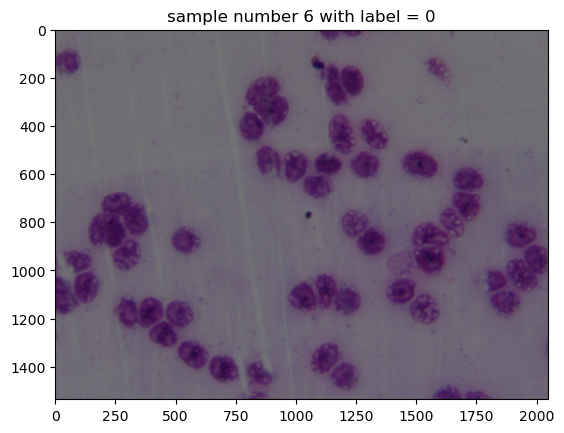

In [6]:
x_test, y_test = prepare_dataset(test_dir)

num = np.random.randint(len(x_test))
plt.imshow(x_test[num])
plt.title(f'sample number {num} with label = {y_test[num]}')
plt.show()

preparing dataset ...


100%|██████████| 235/235 [00:15<00:00, 15.00it/s]


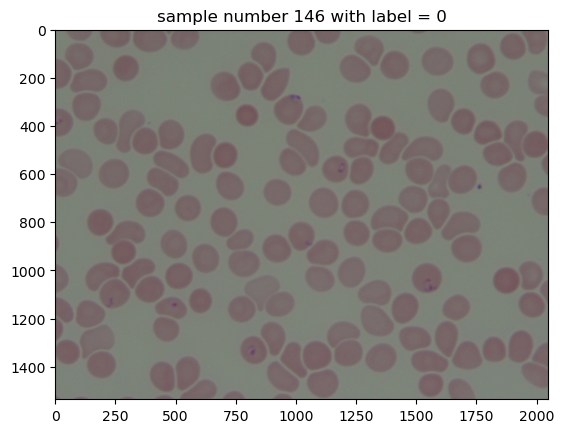

In [7]:
x_train_valid, y_train_valid = prepare_dataset(train_dir)

num = np.random.randint(len(x_train_valid))
plt.imshow(x_train_valid[num])
plt.title(f'sample number {num} with label = {y_train_valid[num]}')
plt.show()

In [8]:
np.shape(x_train_valid)

(235, 1536, 2048, 3)

In [9]:
np.shape(x_test)

(57, 1536, 2048, 3)

In [10]:
# KFold

skf = StratifiedKFold(n_splits=10 , shuffle = True , random_state = 42)
train_indices = []
valid_indices = []

for train_index, valid_index in skf.split(x_train_valid, y_train_valid):
  train_indices.append(train_index)
  valid_indices.append(valid_index)

valid_indices

[array([  3,   5,  21,  26,  30,  53,  76,  78,  87, 105, 108, 121, 123,
        134, 143, 153, 172, 183, 184, 190, 200, 214, 219, 226]),
 array([  4,   6,  29,  35,  36,  40,  51,  54,  59,  65,  69,  97,  98,
        110, 115, 128, 138, 139, 163, 178, 199, 207, 220, 230]),
 array([ 13,  14,  39,  58,  61,  64,  82,  85, 109, 112, 119, 132, 137,
        142, 144, 173, 175, 188, 193, 201, 204, 211, 221, 233]),
 array([  2,   8,  27,  46,  55,  60,  72,  86,  94,  95,  96, 103, 106,
        126, 140, 146, 160, 162, 167, 186, 187, 197, 208, 223]),
 array([ 15,  16,  44,  47,  66,  67,  79,  83,  90, 100, 101, 102, 122,
        127, 135, 151, 152, 155, 156, 157, 169, 198, 206, 232]),
 array([  9,  17,  32,  41,  45,  49,  57,  62,  77,  88,  93, 107, 131,
        136, 159, 168, 171, 177, 180, 192, 215, 216, 222]),
 array([ 10,  11,  23,  31,  37,  38,  63,  68,  75,  84, 104, 111, 113,
        129, 130, 161, 165, 174, 185, 195, 205, 212, 227]),
 array([  0,   1,   7,  12,  20,  22,  25,  

In [11]:
# find specificity
def specificity_score(y_true, y_pred):
    m = confusion_matrix(y_true, y_pred, labels=[0, 1])
    spc = m[0, 0] * 1.0 / (m[0, 0] + m[0, 1])
    return spc

# find sensitivity
def sensitivity_score(y_true, y_pred):
    m = confusion_matrix(y_true, y_pred, labels=[0, 1])
    sen = m[1,1] * 1.0 / (m[1,1] + m[1,0])
    return sen



def plot_roc_curve(p, l):
  fpr, tpr, thresh = roc_curve(p, l)
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall')
  plt.grid()
  plt.show()

# Data Augmentation

In [12]:
img_height = 224
img_width = 224

In [13]:
input_layer = tf.keras.layers.Input(shape=(None,None,3), name='input')
x = tf.keras.layers.Resizing(img_height, img_width, name='resizing')(input_layer)
x = tf.keras.layers.Rescaling(1./255, name='rescaling')(x)
x = tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", name='flip')(x)
x = tf.keras.layers.RandomRotation(0.2, name='rotation')(x)
x = tf.keras.layers.RandomBrightness(0.2, value_range=[0.0, 1.0], name='brightness')(x)
x = tf.keras.layers.RandomZoom(0.2,0.2, name='zoom')(x)
x = tf.keras.layers.RandomTranslation(height_factor = (-0.2,0.2),
                                 width_factor = (-0.2,0.2), name='translate')(x)
model_aug = tf.keras.models.Model(input_layer, x)

model_aug.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, None, 3)]   0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 flip (RandomFlip)           (None, 224, 224, 3)       0         
                                                                 
 rotation (RandomRotation)   (None, 224, 224, 3)       0         
                                                                 
 brightness (RandomBrightnes  (None, 224, 224, 3)      0         
 s)                                                              
                                                             

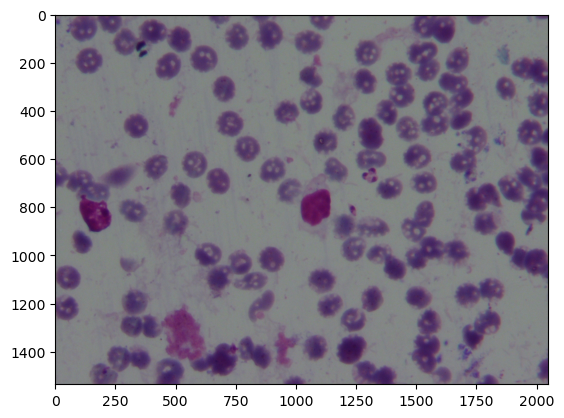

<Figure size 600x400 with 0 Axes>

In [14]:
plt.imshow(x_train_valid[0])
plt.figure(figsize=(6,4))
plt.show()

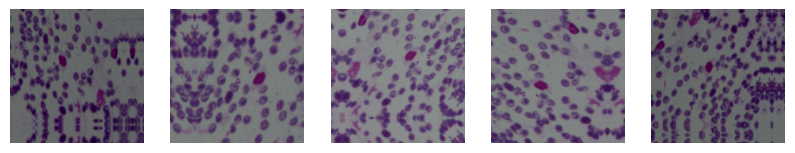

In [15]:
fig = plt.figure(figsize=(10,8))
for i in range(5):
    tmp_aug = model_aug(np.expand_dims(x_train_valid[0], axis=0))
    fig.add_subplot(1,5,i+1)
    plt.imshow(np.squeeze(tmp_aug))
    plt.axis('off')
plt.show()

<Figure size 640x480 with 0 Axes>

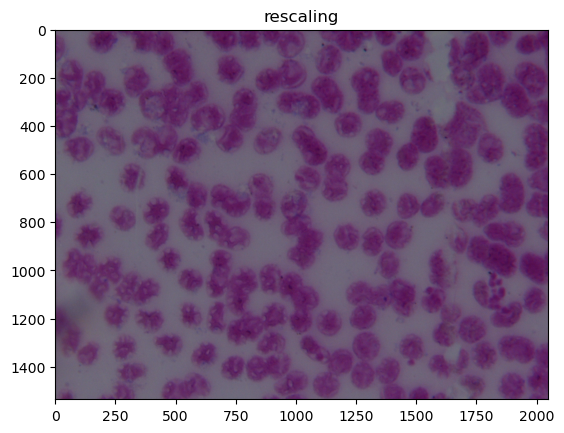

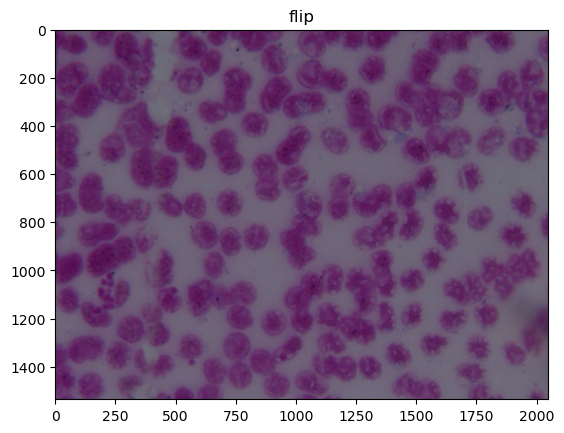

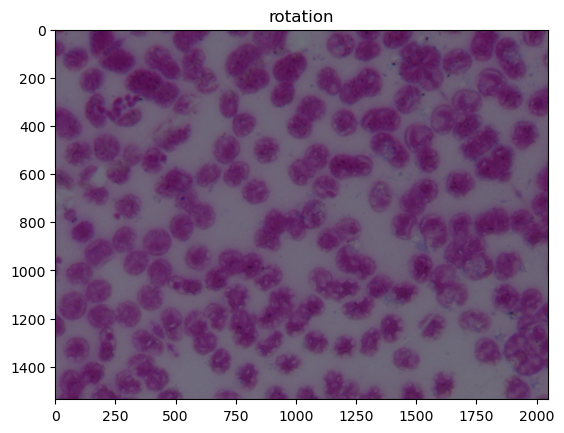

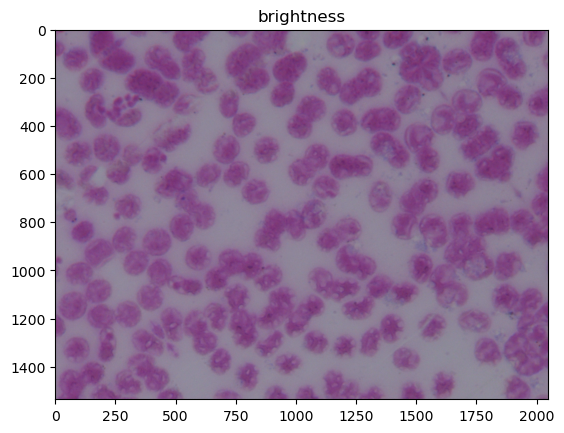

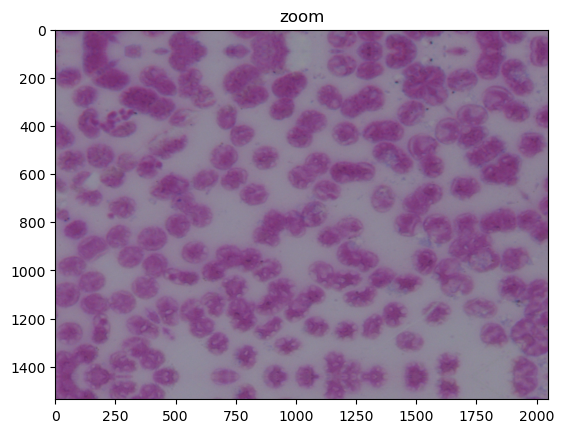

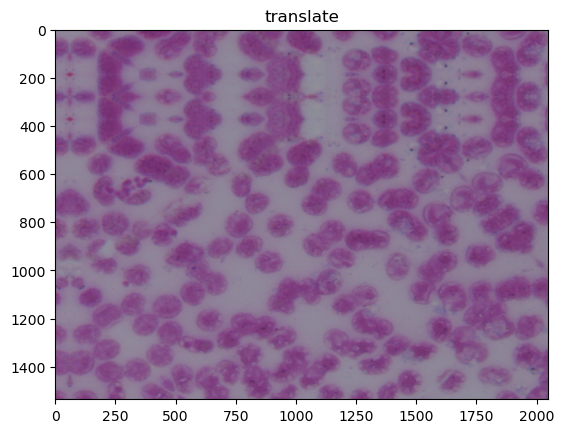

<Figure size 640x480 with 0 Axes>

In [16]:
a2 = model_aug.layers[2](x_train_valid[100])
plt.imshow(a2)
plt.title(model_aug.layers[2].name)
plt.figure()

a3 = model_aug.layers[3](a2)
plt.imshow(a3)
plt.title(model_aug.layers[3].name)
plt.figure()

a4 = model_aug.layers[4](a3)
plt.imshow(a4)
plt.title(model_aug.layers[4].name)
plt.figure()
    
a5 = model_aug.layers[5](a4)
plt.imshow(a5)
plt.title(model_aug.layers[5].name)
plt.figure()

a6 = model_aug.layers[6](a5)
plt.imshow(a6)
plt.title(model_aug.layers[6].name)
plt.figure()

a7 = model_aug.layers[7](a6)
plt.imshow(a7)
plt.title(model_aug.layers[7].name)
plt.figure()


# Model

In [17]:
mobilenet2 = tf.keras.applications.mobilenet_v2.MobileNetV2()

pre_model = tf.keras.Model(mobilenet2.input, mobilenet2.layers[-3].output)

for layer in pre_model.layers:
    layer.trainable = False

pre_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [18]:
tmp_out = pre_model(model_aug.output)

init_model = tf.keras.Model(model_aug.input, tmp_out)
init_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, None, 3)]   0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 flip (RandomFlip)           (None, 224, 224, 3)       0         
                                                                 
 rotation (RandomRotation)   (None, 224, 224, 3)       0         
                                                                 
 brightness (RandomBrightnes  (None, 224, 224, 3)      0         
 s)                                                              
                                                           

In [19]:
def model_comp():
    # Flatten the output layer to 1 dimension
    x = tf.keras.layers.Flatten(name = 'flatten')(init_model.output)
    # Add a fully connected layer with 4 hidden units and ReLU activation
    x = tf.keras.layers.Dense(4, activation='relu', name = 'dense4')(x)
    # Add a dropout rate of 0.25
    x = tf.keras.layers.Dropout(0.25, name = 'drop')(x)                  
    # Add a final sigmoid layer for classification
    x = tf.keras.layers.Dense(1, activation='sigmoid', name='dense1')(x)  


    # Append the dense network to the base model
    model = tf.keras.Model(init_model.input, x) 
    
    # Compile the model
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=5e-6),
             loss = 'binary_crossentropy', metrics = ['acc'])
    
    return model
    # Print the model summary. See your dense network connected at the end.
model = model_comp()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, None, 3)]   0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 flip (RandomFlip)           (None, 224, 224, 3)       0         
                                                                 
 rotation (RandomRotation)   (None, 224, 224, 3)       0         
                                                                 
 brightness (RandomBrightnes  (None, 224, 224, 3)      0         
 s)                                                              
                                                           

# Training (Fold 1)

In [20]:
model = model_comp()
fold_num = 1

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 21s 891ms/step - loss: 0.8625 - acc: 0.4929 - val_loss: 0.7781 - val_acc: 0.5417
Epoch 2/300
7/7 [==============================] - 4s 589ms/step - loss: 0.7185 - acc: 0.5403 - val_loss: 0.7121 - val_acc: 0.6667
Epoch 3/300
7/7 [==============================] - 4s 573ms/step - loss: 0.6615 - acc: 0.6398 - val_loss: 0.6713 - val_acc: 0.6250
Epoch 4/300
7/7 [==============================] - 4s 635ms/step - loss: 0.6568 - acc: 0.6019 - val_loss: 0.6463 - val_acc: 0.6667
Epoch 5/300
7/7 [==============================] - 4s 589ms/step - loss: 0.6629 - acc: 0.6066 - val_loss: 0.6238 - val_acc: 0.6667
Epoch 6/300
7/7 [==============================] - 4s 585ms/step - loss: 0.6228 - acc: 0.6872 - val_loss: 0.6083 - val_acc: 0.7083
Epoch 7/300
7/7 [==============================] - 5s 733ms/step - loss: 0.6342 - acc: 0.7014 - val_loss: 0.5913 - val_acc: 0.7083
Epoch 8/300
7/7 [==============================] - 4s 588ms/step - loss: 0.6576 - 

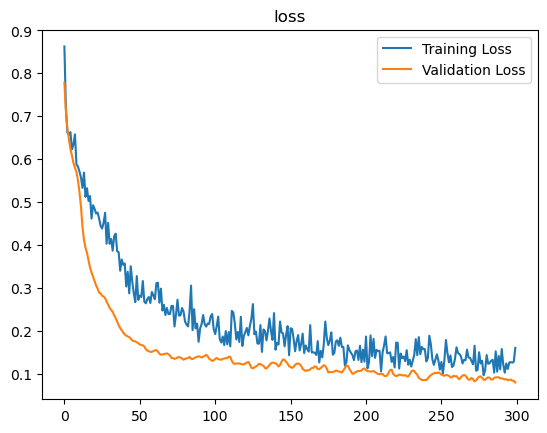

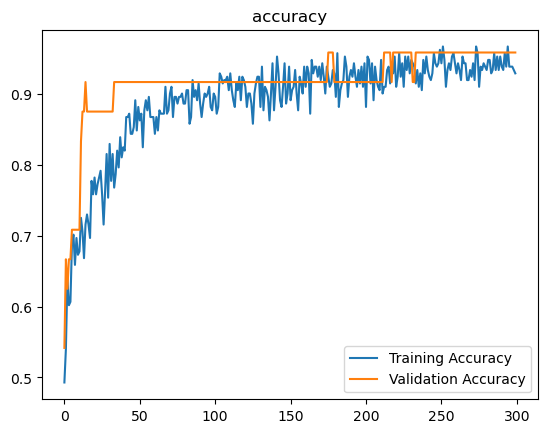

2/2 [==============================] - 1s 226ms/step
accuracy is: 96.49 %
___________________________________________
precision score is: 96.3 %
___________________________________________
recall score is: 96.3 %
___________________________________________
f1 score is: 96.3 %
___________________________________________
specificity is: 96.67 %
___________________________________________
sensitivity is: 96.3 %
___________________________________________
AUC is: 0.9648
___________________________________________
Confusion Matrix:
[[29  1]
 [ 1 26]]
___________________________________________


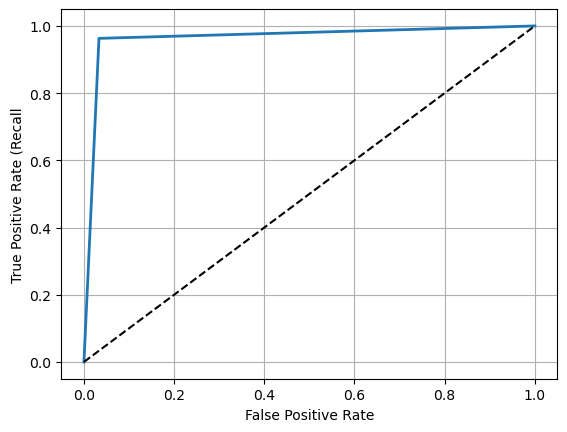

In [21]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 2

In [22]:
model = model_comp()
fold_num = 2

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 16s 857ms/step - loss: 0.8187 - acc: 0.4882 - val_loss: 0.7895 - val_acc: 0.5000
Epoch 2/300
7/7 [==============================] - 4s 637ms/step - loss: 0.7590 - acc: 0.4692 - val_loss: 0.7146 - val_acc: 0.6250
Epoch 3/300
7/7 [==============================] - 4s 586ms/step - loss: 0.6796 - acc: 0.5972 - val_loss: 0.6770 - val_acc: 0.6250
Epoch 4/300
7/7 [==============================] - 4s 585ms/step - loss: 0.6783 - acc: 0.5687 - val_loss: 0.6556 - val_acc: 0.5833
Epoch 5/300
7/7 [==============================] - 4s 617ms/step - loss: 0.6186 - acc: 0.6351 - val_loss: 0.6396 - val_acc: 0.6667
Epoch 6/300
7/7 [==============================] - 4s 583ms/step - loss: 0.6441 - acc: 0.6256 - val_loss: 0.6261 - val_acc: 0.6667
Epoch 7/300
7/7 [==============================] - 4s 637ms/step - loss: 0.6303 - acc: 0.6161 - val_loss: 0.6145 - val_acc: 0.6667
Epoch 8/300
7/7 [==============================] - 4s 575ms/step - loss: 0.5957 - 

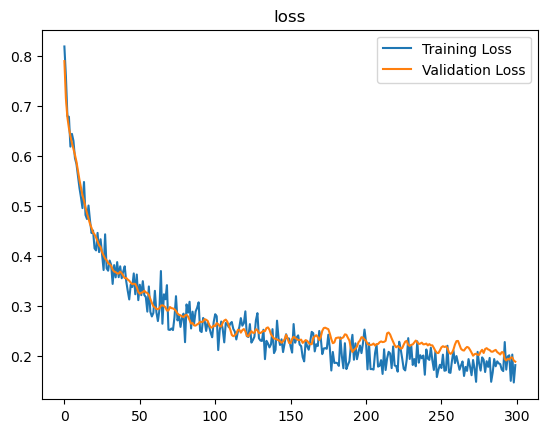

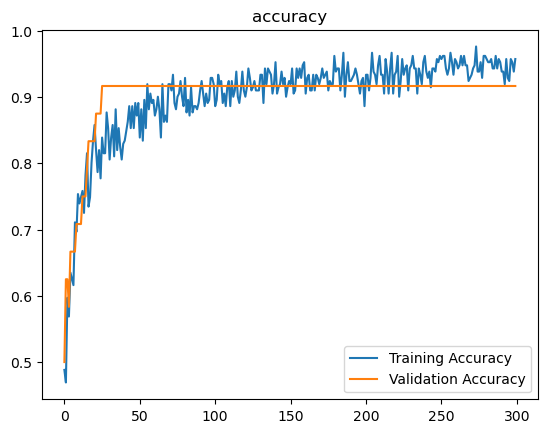

2/2 [==============================] - 1s 99ms/step
accuracy is: 98.25 %
___________________________________________
precision score is: 96.43 %
___________________________________________
recall score is: 100.0 %
___________________________________________
f1 score is: 98.18 %
___________________________________________
specificity is: 96.67 %
___________________________________________
sensitivity is: 100.0 %
___________________________________________
AUC is: 0.9833
___________________________________________
Confusion Matrix:
[[29  1]
 [ 0 27]]
___________________________________________


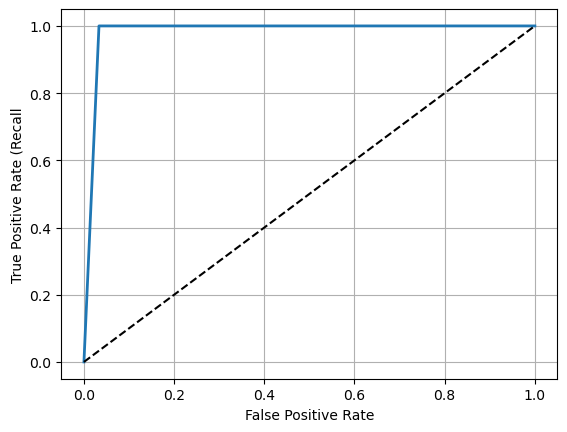

In [23]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 3

In [24]:
model = model_comp()
fold_num = 3

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 16s 839ms/step - loss: 0.9402 - acc: 0.4313 - val_loss: 0.8940 - val_acc: 0.3333
Epoch 2/300
7/7 [==============================] - 5s 706ms/step - loss: 0.7535 - acc: 0.4929 - val_loss: 0.8500 - val_acc: 0.2917
Epoch 3/300
7/7 [==============================] - 5s 660ms/step - loss: 0.7263 - acc: 0.4882 - val_loss: 0.8080 - val_acc: 0.2917
Epoch 4/300
7/7 [==============================] - 4s 613ms/step - loss: 0.7350 - acc: 0.5071 - val_loss: 0.7728 - val_acc: 0.5000
Epoch 5/300
7/7 [==============================] - 5s 673ms/step - loss: 0.6701 - acc: 0.6493 - val_loss: 0.7482 - val_acc: 0.5000
Epoch 6/300
7/7 [==============================] - 4s 627ms/step - loss: 0.6298 - acc: 0.6919 - val_loss: 0.7377 - val_acc: 0.5000
Epoch 7/300
7/7 [==============================] - 5s 657ms/step - loss: 0.6281 - acc: 0.6256 - val_loss: 0.7303 - val_acc: 0.5000
Epoch 8/300
7/7 [==============================] - 5s 650ms/step - loss: 0.5887 - 

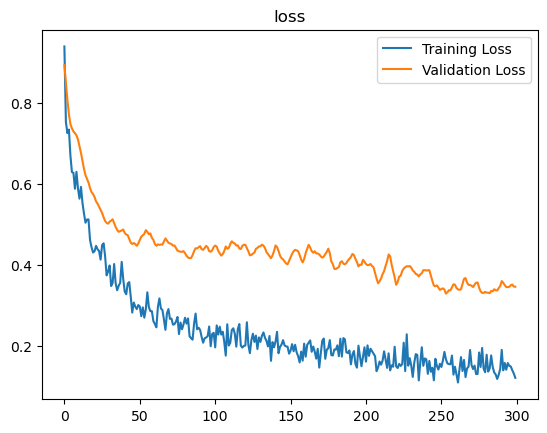

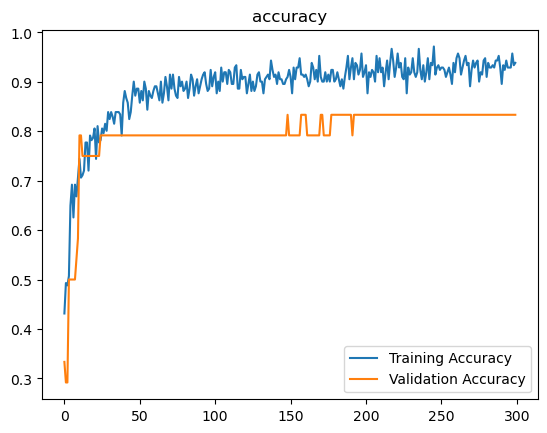

2/2 [==============================] - 1s 97ms/step
accuracy is: 98.25 %
___________________________________________
precision score is: 96.43 %
___________________________________________
recall score is: 100.0 %
___________________________________________
f1 score is: 98.18 %
___________________________________________
specificity is: 96.67 %
___________________________________________
sensitivity is: 100.0 %
___________________________________________
AUC is: 0.9833
___________________________________________
Confusion Matrix:
[[29  1]
 [ 0 27]]
___________________________________________


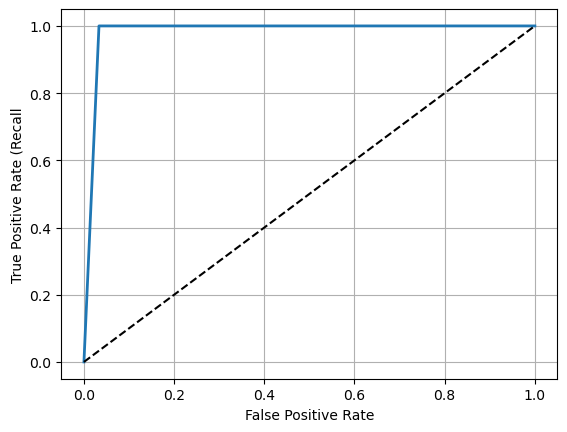

In [25]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 4

In [20]:
model = model_comp()
fold_num = 4

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 21s 894ms/step - loss: 0.8160 - acc: 0.5403 - val_loss: 0.7720 - val_acc: 0.6250
Epoch 2/300
7/7 [==============================] - 4s 567ms/step - loss: 0.8317 - acc: 0.5166 - val_loss: 0.7237 - val_acc: 0.6250
Epoch 3/300
7/7 [==============================] - 4s 574ms/step - loss: 0.7084 - acc: 0.6114 - val_loss: 0.6940 - val_acc: 0.5833
Epoch 4/300
7/7 [==============================] - 4s 605ms/step - loss: 0.6911 - acc: 0.5972 - val_loss: 0.6658 - val_acc: 0.6250
Epoch 5/300
7/7 [==============================] - 5s 634ms/step - loss: 0.6682 - acc: 0.6351 - val_loss: 0.6426 - val_acc: 0.6667
Epoch 6/300
7/7 [==============================] - 4s 621ms/step - loss: 0.6937 - acc: 0.6398 - val_loss: 0.6195 - val_acc: 0.6667
Epoch 7/300
7/7 [==============================] - 4s 574ms/step - loss: 0.5764 - acc: 0.7204 - val_loss: 0.5965 - val_acc: 0.7083
Epoch 8/300
7/7 [==============================] - 4s 570ms/step - loss: 0.5564 - 

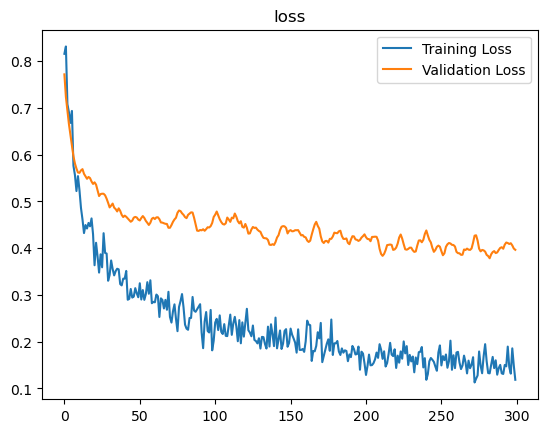

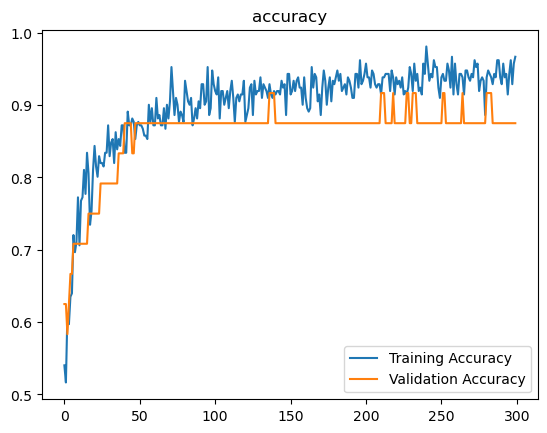

2/2 [==============================] - 1s 219ms/step
accuracy is: 98.25 %
___________________________________________
precision score is: 100.0 %
___________________________________________
recall score is: 96.3 %
___________________________________________
f1 score is: 98.11 %
___________________________________________
specificity is: 100.0 %
___________________________________________
sensitivity is: 96.3 %
___________________________________________
AUC is: 0.9815
___________________________________________
Confusion Matrix:
[[30  0]
 [ 1 26]]
___________________________________________


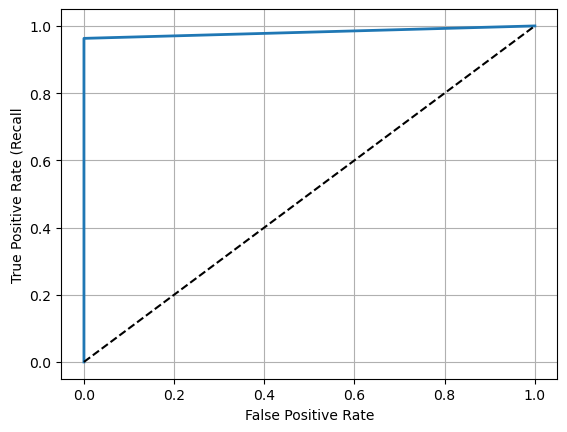

In [21]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 5

In [22]:
model = model_comp()
fold_num = 5

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 16s 830ms/step - loss: 0.8175 - acc: 0.4076 - val_loss: 0.7276 - val_acc: 0.3333
Epoch 2/300
7/7 [==============================] - 4s 573ms/step - loss: 0.7453 - acc: 0.4597 - val_loss: 0.6827 - val_acc: 0.4167
Epoch 3/300
7/7 [==============================] - 5s 657ms/step - loss: 0.7426 - acc: 0.4171 - val_loss: 0.6579 - val_acc: 0.4167
Epoch 4/300
7/7 [==============================] - 4s 587ms/step - loss: 0.6915 - acc: 0.4692 - val_loss: 0.6443 - val_acc: 0.4583
Epoch 5/300
7/7 [==============================] - 4s 583ms/step - loss: 0.6913 - acc: 0.4787 - val_loss: 0.6347 - val_acc: 0.6250
Epoch 6/300
7/7 [==============================] - 5s 722ms/step - loss: 0.6691 - acc: 0.6256 - val_loss: 0.6288 - val_acc: 0.6250
Epoch 7/300
7/7 [==============================] - 4s 586ms/step - loss: 0.6657 - acc: 0.6493 - val_loss: 0.6235 - val_acc: 0.6250
Epoch 8/300
7/7 [==============================] - 4s 640ms/step - loss: 0.6544 - 

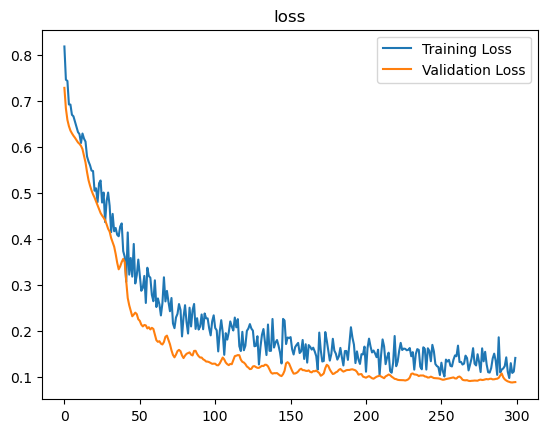

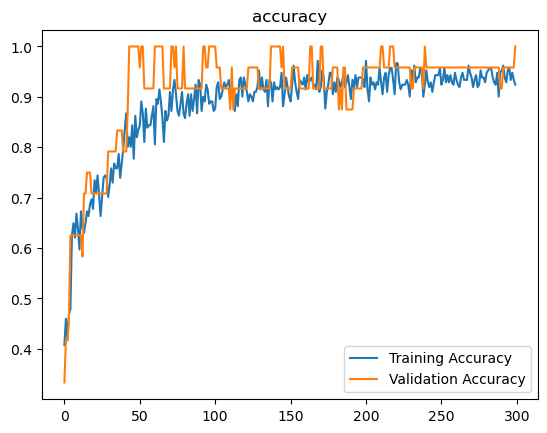

2/2 [==============================] - 1s 99ms/step
accuracy is: 98.25 %
___________________________________________
precision score is: 100.0 %
___________________________________________
recall score is: 96.3 %
___________________________________________
f1 score is: 98.11 %
___________________________________________
specificity is: 100.0 %
___________________________________________
sensitivity is: 96.3 %
___________________________________________
AUC is: 0.9815
___________________________________________
Confusion Matrix:
[[30  0]
 [ 1 26]]
___________________________________________


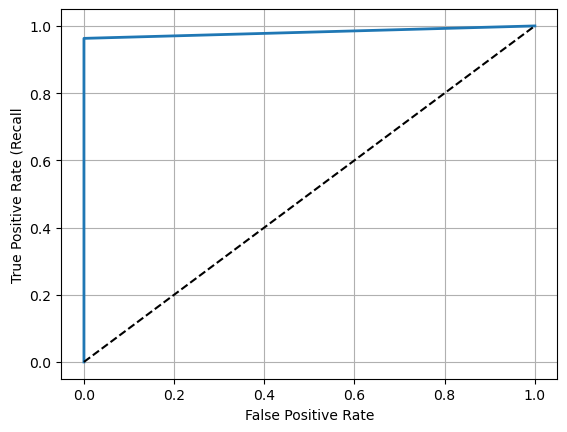

In [23]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 6

In [20]:
model = model_comp()
fold_num = 6

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 22s 919ms/step - loss: 0.7311 - acc: 0.4434 - val_loss: 0.6805 - val_acc: 0.5217
Epoch 2/300
7/7 [==============================] - 4s 588ms/step - loss: 0.7002 - acc: 0.5330 - val_loss: 0.6628 - val_acc: 0.5652
Epoch 3/300
7/7 [==============================] - 4s 593ms/step - loss: 0.7085 - acc: 0.5330 - val_loss: 0.6564 - val_acc: 0.6522
Epoch 4/300
7/7 [==============================] - 5s 729ms/step - loss: 0.6853 - acc: 0.5802 - val_loss: 0.6527 - val_acc: 0.6522
Epoch 5/300
7/7 [==============================] - 4s 578ms/step - loss: 0.6859 - acc: 0.5472 - val_loss: 0.6519 - val_acc: 0.6957
Epoch 6/300
7/7 [==============================] - 5s 659ms/step - loss: 0.6892 - acc: 0.5708 - val_loss: 0.6508 - val_acc: 0.6957
Epoch 7/300
7/7 [==============================] - 4s 603ms/step - loss: 0.6648 - acc: 0.6698 - val_loss: 0.6466 - val_acc: 0.7826
Epoch 8/300
7/7 [==============================] - 4s 599ms/step - loss: 0.6687 - 

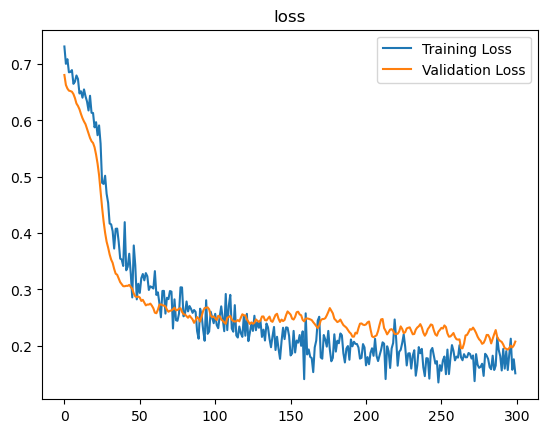

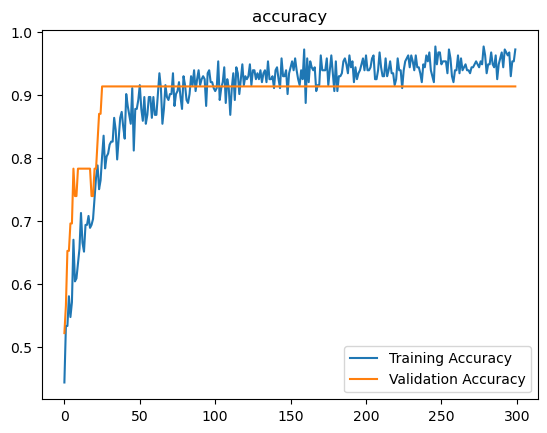

2/2 [==============================] - 2s 217ms/step
accuracy is: 94.74 %
___________________________________________
precision score is: 92.86 %
___________________________________________
recall score is: 96.3 %
___________________________________________
f1 score is: 94.55 %
___________________________________________
specificity is: 93.33 %
___________________________________________
sensitivity is: 96.3 %
___________________________________________
AUC is: 0.9481
___________________________________________
Confusion Matrix:
[[28  2]
 [ 1 26]]
___________________________________________


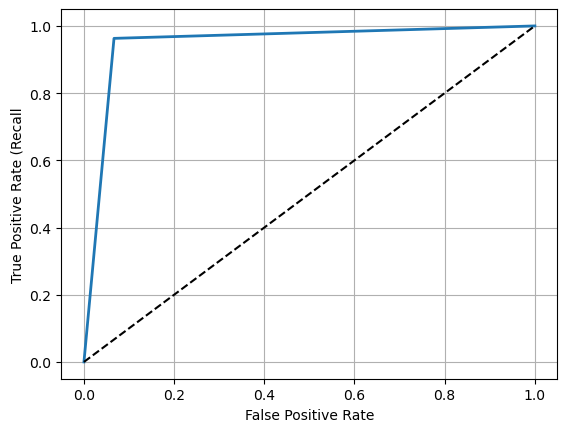

In [21]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 7

In [22]:
model = model_comp()
fold_num = 7

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 20s 815ms/step - loss: 0.7584 - acc: 0.5094 - val_loss: 0.7358 - val_acc: 0.6087
Epoch 2/300
7/7 [==============================] - 4s 633ms/step - loss: 0.7030 - acc: 0.5660 - val_loss: 0.6954 - val_acc: 0.4348
Epoch 3/300
7/7 [==============================] - 4s 600ms/step - loss: 0.6514 - acc: 0.5849 - val_loss: 0.6648 - val_acc: 0.4348
Epoch 4/300
7/7 [==============================] - 4s 608ms/step - loss: 0.6300 - acc: 0.5896 - val_loss: 0.6376 - val_acc: 0.4783
Epoch 5/300
7/7 [==============================] - 5s 742ms/step - loss: 0.6053 - acc: 0.6462 - val_loss: 0.6148 - val_acc: 0.5652
Epoch 6/300
7/7 [==============================] - 4s 603ms/step - loss: 0.5986 - acc: 0.6604 - val_loss: 0.5954 - val_acc: 0.6087
Epoch 7/300
7/7 [==============================] - 4s 641ms/step - loss: 0.5821 - acc: 0.6981 - val_loss: 0.5814 - val_acc: 0.6087
Epoch 8/300
7/7 [==============================] - 4s 610ms/step - loss: 0.6054 - 

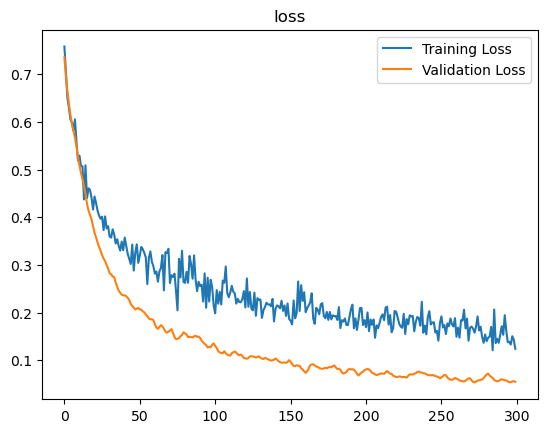

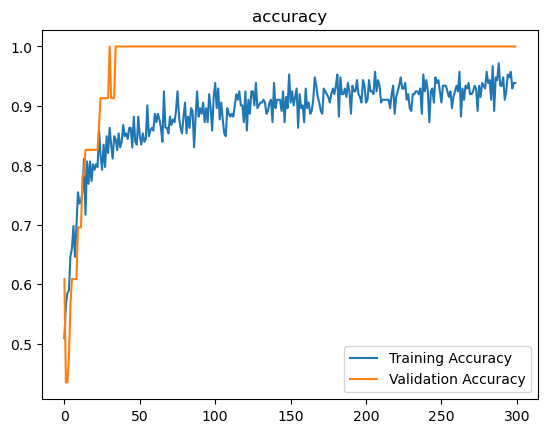

2/2 [==============================] - 1s 97ms/step
accuracy is: 96.49 %
___________________________________________
precision score is: 96.3 %
___________________________________________
recall score is: 96.3 %
___________________________________________
f1 score is: 96.3 %
___________________________________________
specificity is: 96.67 %
___________________________________________
sensitivity is: 96.3 %
___________________________________________
AUC is: 0.9648
___________________________________________
Confusion Matrix:
[[29  1]
 [ 1 26]]
___________________________________________


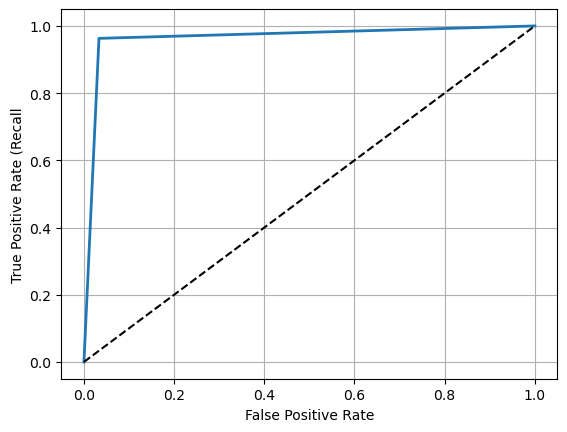

In [23]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 8

In [24]:
model = model_comp()
fold_num = 8

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 17s 870ms/step - loss: 0.7281 - acc: 0.5708 - val_loss: 0.7047 - val_acc: 0.4783
Epoch 2/300
7/7 [==============================] - 4s 604ms/step - loss: 0.6714 - acc: 0.5708 - val_loss: 0.6949 - val_acc: 0.5652
Epoch 3/300
7/7 [==============================] - 5s 667ms/step - loss: 0.6819 - acc: 0.5708 - val_loss: 0.6870 - val_acc: 0.5217
Epoch 4/300
7/7 [==============================] - 4s 618ms/step - loss: 0.6496 - acc: 0.6368 - val_loss: 0.6800 - val_acc: 0.5652
Epoch 5/300
7/7 [==============================] - 4s 630ms/step - loss: 0.6349 - acc: 0.6274 - val_loss: 0.6714 - val_acc: 0.5652
Epoch 6/300
7/7 [==============================] - 5s 718ms/step - loss: 0.6242 - acc: 0.6887 - val_loss: 0.6589 - val_acc: 0.5652
Epoch 7/300
7/7 [==============================] - 4s 610ms/step - loss: 0.5998 - acc: 0.7453 - val_loss: 0.6415 - val_acc: 0.6087
Epoch 8/300
7/7 [==============================] - 5s 653ms/step - loss: 0.5756 - 

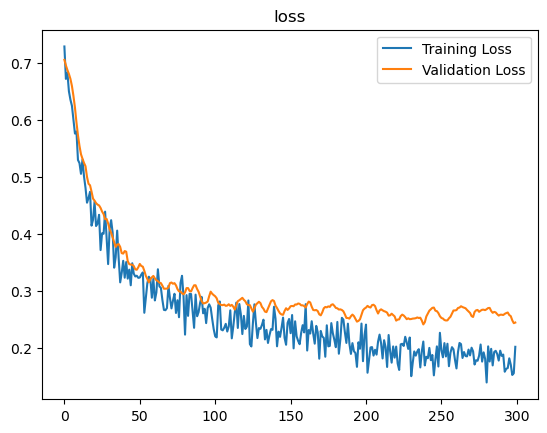

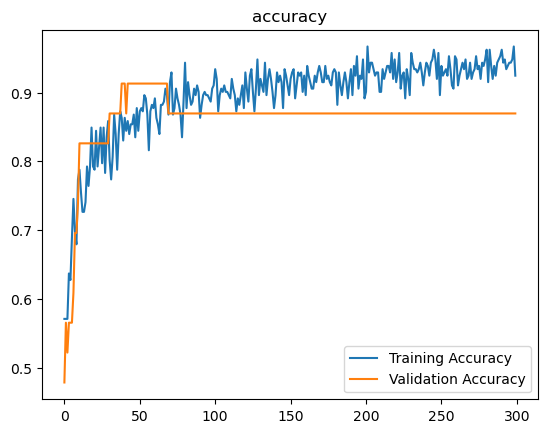

2/2 [==============================] - 2s 99ms/step
accuracy is: 96.49 %
___________________________________________
precision score is: 93.1 %
___________________________________________
recall score is: 100.0 %
___________________________________________
f1 score is: 96.43 %
___________________________________________
specificity is: 93.33 %
___________________________________________
sensitivity is: 100.0 %
___________________________________________
AUC is: 0.9667
___________________________________________
Confusion Matrix:
[[28  2]
 [ 0 27]]
___________________________________________


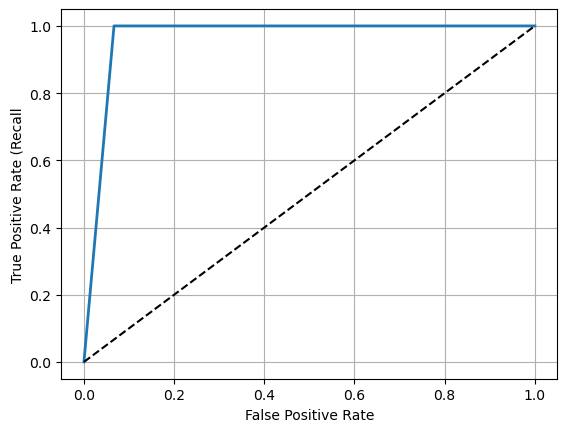

In [25]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 9

In [20]:
model = model_comp()
fold_num = 9

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 22s 838ms/step - loss: 1.0609 - acc: 0.4906 - val_loss: 0.7029 - val_acc: 0.6087
Epoch 2/300
7/7 [==============================] - 4s 607ms/step - loss: 0.8366 - acc: 0.5142 - val_loss: 0.6459 - val_acc: 0.6522
Epoch 3/300
7/7 [==============================] - 4s 585ms/step - loss: 0.7304 - acc: 0.5708 - val_loss: 0.6268 - val_acc: 0.6087
Epoch 4/300
7/7 [==============================] - 4s 574ms/step - loss: 0.7298 - acc: 0.5519 - val_loss: 0.6115 - val_acc: 0.6087
Epoch 5/300
7/7 [==============================] - 4s 627ms/step - loss: 0.6496 - acc: 0.5943 - val_loss: 0.6045 - val_acc: 0.6087
Epoch 6/300
7/7 [==============================] - 5s 698ms/step - loss: 0.6015 - acc: 0.6509 - val_loss: 0.5986 - val_acc: 0.6087
Epoch 7/300
7/7 [==============================] - 4s 602ms/step - loss: 0.5742 - acc: 0.6462 - val_loss: 0.5950 - val_acc: 0.6087
Epoch 8/300
7/7 [==============================] - 4s 592ms/step - loss: 0.5867 - 

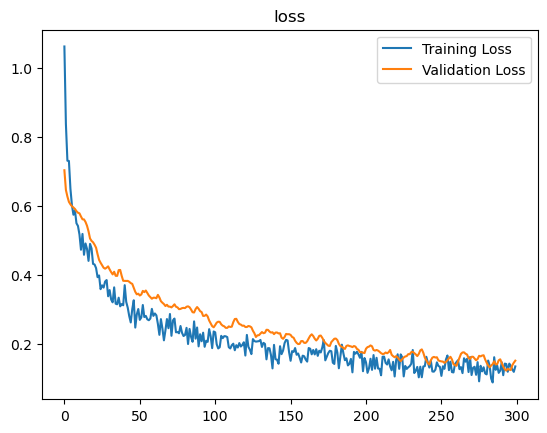

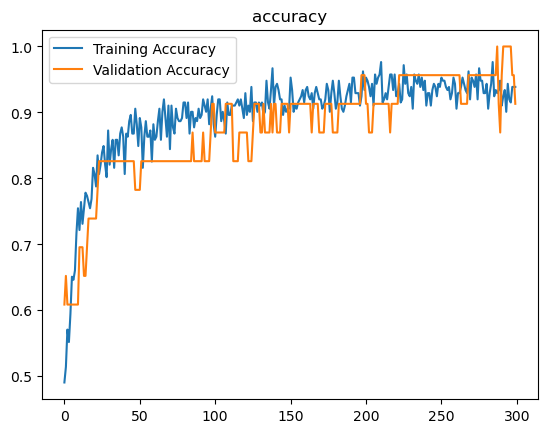

2/2 [==============================] - 2s 232ms/step
accuracy is: 96.49 %
___________________________________________
precision score is: 96.3 %
___________________________________________
recall score is: 96.3 %
___________________________________________
f1 score is: 96.3 %
___________________________________________
specificity is: 96.67 %
___________________________________________
sensitivity is: 96.3 %
___________________________________________
AUC is: 0.9648
___________________________________________
Confusion Matrix:
[[29  1]
 [ 1 26]]
___________________________________________


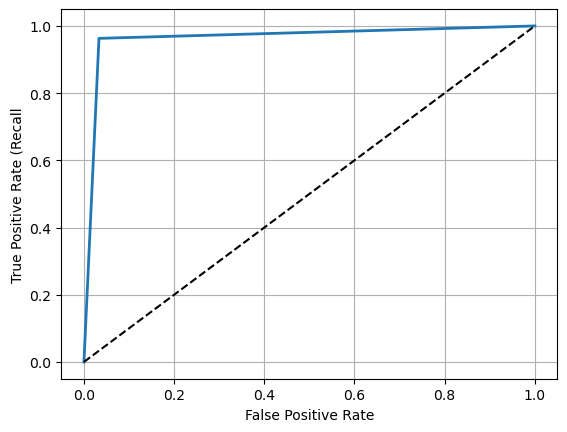

In [21]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)

# Fold 10

In [22]:
model = model_comp()
fold_num = 10

hist = model.fit(x_train_valid[train_indices[fold_num-1]],
                 y_train_valid[train_indices[fold_num-1]],
                 validation_data = (x_train_valid[valid_indices[fold_num-1]],
                                   y_train_valid[valid_indices[fold_num-1]]),
                 epochs = 300,
                 verbose = 1)

Epoch 1/300
7/7 [==============================] - 16s 794ms/step - loss: 0.7633 - acc: 0.5566 - val_loss: 0.6918 - val_acc: 0.6522
Epoch 2/300
7/7 [==============================] - 4s 621ms/step - loss: 0.7134 - acc: 0.4906 - val_loss: 0.6697 - val_acc: 0.7391
Epoch 3/300
7/7 [==============================] - 5s 685ms/step - loss: 0.6620 - acc: 0.5849 - val_loss: 0.6552 - val_acc: 0.7391
Epoch 4/300
7/7 [==============================] - 4s 640ms/step - loss: 0.6637 - acc: 0.5849 - val_loss: 0.6435 - val_acc: 0.7391
Epoch 5/300
7/7 [==============================] - 4s 595ms/step - loss: 0.6458 - acc: 0.6226 - val_loss: 0.6298 - val_acc: 0.7391
Epoch 6/300
7/7 [==============================] - 4s 591ms/step - loss: 0.6544 - acc: 0.6415 - val_loss: 0.6132 - val_acc: 0.7391
Epoch 7/300
7/7 [==============================] - 4s 637ms/step - loss: 0.6333 - acc: 0.6038 - val_loss: 0.5997 - val_acc: 0.7391
Epoch 8/300
7/7 [==============================] - 4s 592ms/step - loss: 0.6265 - 

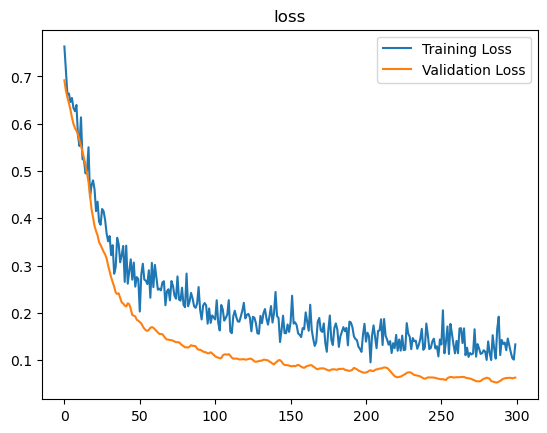

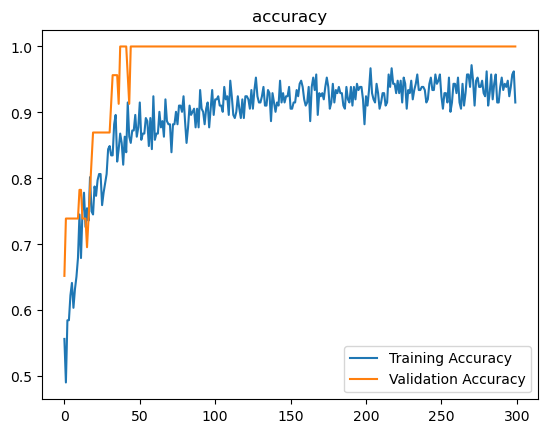

2/2 [==============================] - 2s 91ms/step
accuracy is: 100.0 %
___________________________________________
precision score is: 100.0 %
___________________________________________
recall score is: 100.0 %
___________________________________________
f1 score is: 100.0 %
___________________________________________
specificity is: 100.0 %
___________________________________________
sensitivity is: 100.0 %
___________________________________________
AUC is: 1.0
___________________________________________
Confusion Matrix:
[[30  0]
 [ 0 27]]
___________________________________________


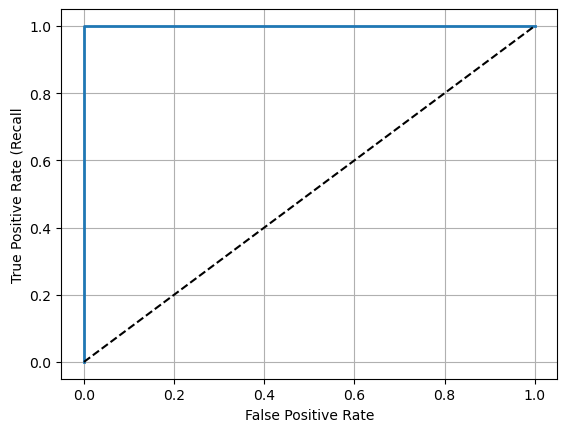

In [23]:
#plot acc and loss

model.save(f'/kaggle/working/model_{fold_num}.h5')

epochs = range(len(hist.history['loss']))
plt.plot(epochs , hist.history['loss'], label='Training Loss')
plt.plot(epochs , hist.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()

plt.figure()

plt.plot(epochs , hist.history['acc'], label='Training Accuracy')
plt.plot(epochs , hist.history['val_acc'], label='Validation Accuracy')
plt.title('accuracy')
plt.legend()

plt.show()

y_pred = model.predict(x_test)

prediction = np.zeros(np.shape(y_pred))
prediction[y_pred > 0.5] = 1

accuracy = accuracy_score(y_test   , prediction)
print('accuracy is:' , np.round(accuracy*100,2) , '%')
print('___________________________________________')
pscore = precision_score(y_test   , prediction)
print('precision score is:' , np.round(pscore*100,2) , '%')
print('___________________________________________')
rscore = recall_score(y_test   , prediction)
print('recall score is:' , np.round(rscore*100,2) , '%')
print('___________________________________________')
fscore = f1_score(y_test   , prediction)
print('f1 score is:' , np.round(fscore*100,2) , '%')
print('___________________________________________')
spc = specificity_score(y_test   , prediction)
print('specificity is:' , np.round(spc*100,2) , '%')
print('___________________________________________')
sen = sensitivity_score(y_test   , prediction)
print('sensitivity is:' , np.round(sen*100,2) , '%')
print('___________________________________________')
auc = roc_auc_score(y_test   , prediction)
print('AUC is:' , np.round(auc,4))
print('___________________________________________')
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))
print('___________________________________________')
plot_roc_curve(y_test, prediction)